In [1]:
#  Perform Exploratory Data Anaylsis needed.
#  Create Gradient Boosting Classification model
#  Create Ada Boosting Classification model
#  Create Extreme Gradient Boosting model

In [2]:
# First import basic libraries  
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load dataset
dt=pd.read_csv("diabeties.csv")
dt.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#check dtypes
dt.dtypes

pregnant       int64
glocose        int64
bp             int64
skin           int64
insulin        int64
bmi          float64
predigree    float64
age            int64
target         int64
dtype: object

In [5]:
#check info of dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#checking null values
dt.isnull().sum()

pregnant     0
glocose      0
bp           0
skin         0
insulin      0
bmi          0
predigree    0
age          0
target       0
dtype: int64

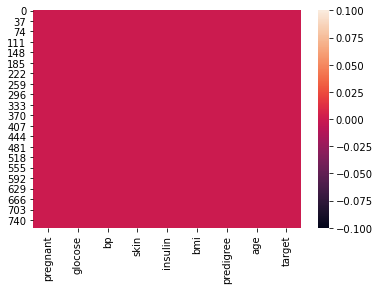

In [7]:
#checking null vlaues in heatmap graph
sb.heatmap(dt.isnull())
plt.show()

In [8]:
#check total column and rows
dt.shape

(768, 9)

In [9]:
X=dt.drop("target",axis=1) #select input and drop output 
Y=dt["target"] #select output

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#tran test split 70% 30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [12]:
#create function
def create_model(model):
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred)) 
    print("CONFUSION MATRIX")
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [41]:
#craete a object of LogisticRegression
lr=LogisticRegression()

In [42]:
#create a class of decisiontreeclassifier class
dc1=DecisionTreeClassifier() #it will take gini index

In [43]:
dc2=DecisionTreeClassifier(criterion="entropy") #we have to mention here entropy otherwise it will take gini index

In [44]:
#create a model_list and then concate all above class into them
model_list=[("logistic",lr),("DecisionTree_Gini",dc1),("DecisionTree_Entropy",dc2)]

# Naive Aggregation

In [45]:
#then we need
#Naive Aggregation
from sklearn.ensemble import VotingClassifier

In [46]:
#create object of VotingClassifier 
vc=VotingClassifier(estimators=model_list) #checking with hard 

In [47]:
#Then call the function
vc=create_model(vc)

              precision    recall  f1-score   support

           0       0.76      0.84      0.79       146
           1       0.66      0.54      0.59        85

    accuracy                           0.73       231
   macro avg       0.71      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231

CONFUSION MATRIX
[[122  24]
 [ 39  46]]


In [48]:
vc1=VotingClassifier(estimators=model_list,voting="soft") #mention there is soft otherwise it wiil take hard
#call the functoin
vc1=create_model(vc1)

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       146
           1       0.68      0.56      0.62        85

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.73      0.74      0.73       231

CONFUSION MATRIX
[[123  23]
 [ 37  48]]


# Boosting Technique

In [49]:
#Boosting Technique
#1.Baaging method
from sklearn.ensemble import BaggingClassifier

In [97]:
bc = BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=400,random_state=1)

In [98]:
#call the function
bc = create_model(bc)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

CONFUSION MATRIX
[[132  14]
 [ 36  49]]


# In above When we use Pasting and Random Forest Tree the recall of 1 is decreasing that's why we use only  BaggingClassifier

# Boosting Technique
        a. ADA Boost(Adaptor Boosting)

In [70]:
#ADA Boost(Adaptor Boosting)
from sklearn.ensemble import AdaBoostClassifier

In [99]:
ada=AdaBoostClassifier(n_estimators=75)

In [100]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.59      0.66        85

    accuracy                           0.77       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231

CONFUSION MATRIX
[[129  17]
 [ 35  50]]


# b.Gradient Boosting

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [101]:
gbc=GradientBoostingClassifier(n_estimators=85)

In [102]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       146
           1       0.77      0.64      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231

CONFUSION MATRIX
[[130  16]
 [ 31  54]]


# c. Extreme Gradient Boosting (XG Boost)

In [87]:
#before performing Extreme Gradient Boosting (XG Boost) we need to install xgboost

In [89]:
#!pip install xgboost

In [91]:
from xgboost import XGBClassifier

In [113]:
xgbc=XGBClassifier(n_estimators=60,reg_alpha=1)

In [114]:
xgbc=create_model(xgbc)

[21:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.74      0.65      0.69        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.78      0.79      0.78       231

CONFUSION MATRIX
[[127  19]
 [ 30  55]]


In [ ]:
#In above Extreme Gradient Boosting (XG Boost) is giving best recall value as compare to other.